<a href="https://colab.research.google.com/github/DEEPAKdotcsv/machine_learning/blob/main/Datacleaning_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline

In [87]:
base_data = pd.read_excel('/content/Titanic-Dataset.csv.xlsx')

In [88]:
base_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [89]:
base_data.shape

(891, 12)

In [90]:
base_data.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [91]:
base_data.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [92]:
#descriptive statistics
base_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [93]:
base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [94]:
print(891-714) #missing age data
print(891-204) #missing cabin data
print(891-889) #missing embarked data

177
687
2


In [95]:
print(base_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [96]:
base_data['Age']=base_data['Age'].fillna(base_data['Age'].mean())

In [97]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')

base_data['Embarked'] = imputer.fit_transform(base_data[['Embarked']]).ravel()

In [98]:
print(f"{(687/891)*100} missing cabin data")

77.10437710437711 missing cabin data


In [99]:
base_data=base_data.dropna(axis=1)

In [100]:
print(base_data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [101]:
base_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.00,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.00,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.45,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.00,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.000000,0,0,370376,7.75,Q


In [102]:
base_data=pd.get_dummies(base_data,columns=['Sex','Embarked'],drop_first=True)

In [103]:
base_data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,True,False,True


In [104]:
print(base_data['Age'].dtype)
print(base_data['Age'].isnull().sum())
print(base_data['Age'].head(10))

float64
0
0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: Age, dtype: float64


In [105]:
print(base_data['Age'].value_counts())

Age
29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
24.500000      1
0.670000       1
0.420000       1
34.500000      1
74.000000      1
Name: count, Length: 89, dtype: int64


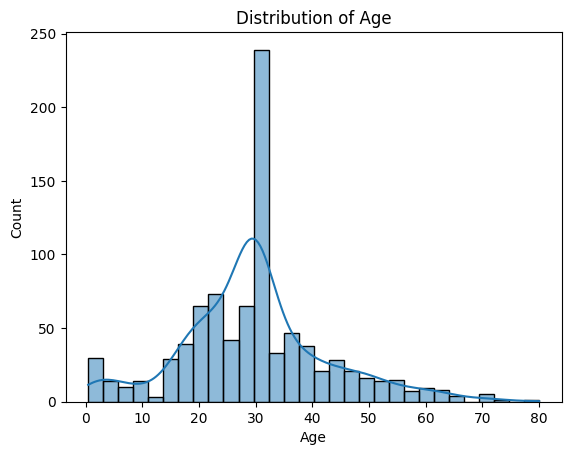

In [106]:
sns.histplot(base_data['Age'], kde=True)
plt.title('Distribution of Age')
plt.show()

In [108]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
base_data['Age'] = scaler.fit_transform(base_data[['Age']])

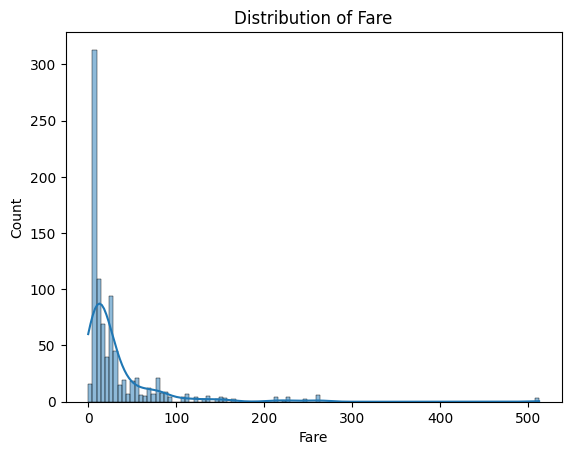

In [109]:
sns.histplot(base_data['Fare'], kde=True)
plt.title('Distribution of Fare')
plt.show()

In [110]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
base_data['Fare'] = min_max_scaler.fit_transform(base_data[['Fare']])

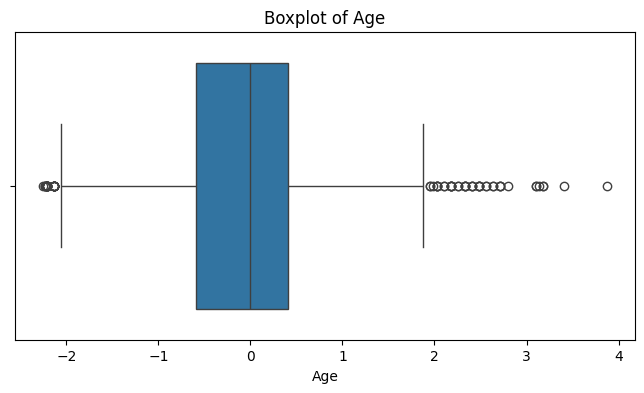

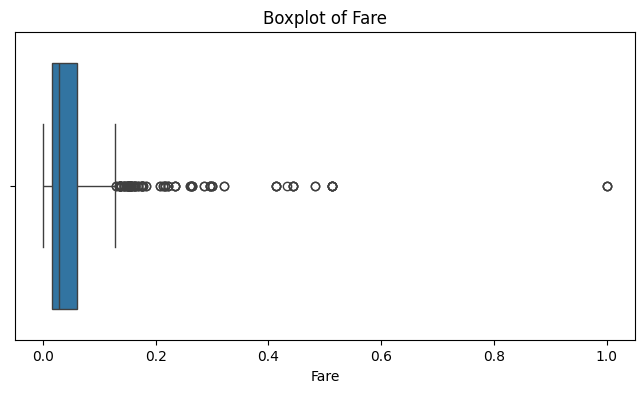

In [111]:
# Boxplot for Age
plt.figure(figsize=(8, 4))
sns.boxplot(x=base_data['Age'])
plt.title('Boxplot of Age')
plt.show()

# Boxplot for Fare
plt.figure(figsize=(8, 4))
sns.boxplot(x=base_data['Fare'])
plt.title('Boxplot of Fare')
plt.show()

In [113]:
def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    filtered_df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return filtered_df

base_data_wo_outliers = remove_outliers_iqr(base_data, 'Age')
base_data_wo_outliers = remove_outliers_iqr(base_data, 'Fare')

print(f"Original data size: {base_data.shape}")
print(f"Data size after removing Age outliers: {base_data_wo_outliers.shape}")


Original data size: (891, 12)
Data size after removing Age outliers: (775, 12)


In [114]:
base_data_wo_outliers.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",-0.592481,1,0,A/5 21171,0.014151,True,False,True
2,3,1,3,"Heikkinen, Miss. Laina",-0.284663,0,0,STON/O2. 3101282,0.015469,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.407926,1,0,113803,0.103644,False,False,True
4,5,0,3,"Allen, Mr. William Henry",0.407926,0,0,373450,0.015713,True,False,True
5,6,0,3,"Moran, Mr. James",0.000000,0,0,330877,0.016510,True,True,False
